In [27]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

🟩 Top Companies Bar Plot (2.20.1) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.
Hint:

Use sns.barplot() to create the bar plot and sort the companies by median salary.


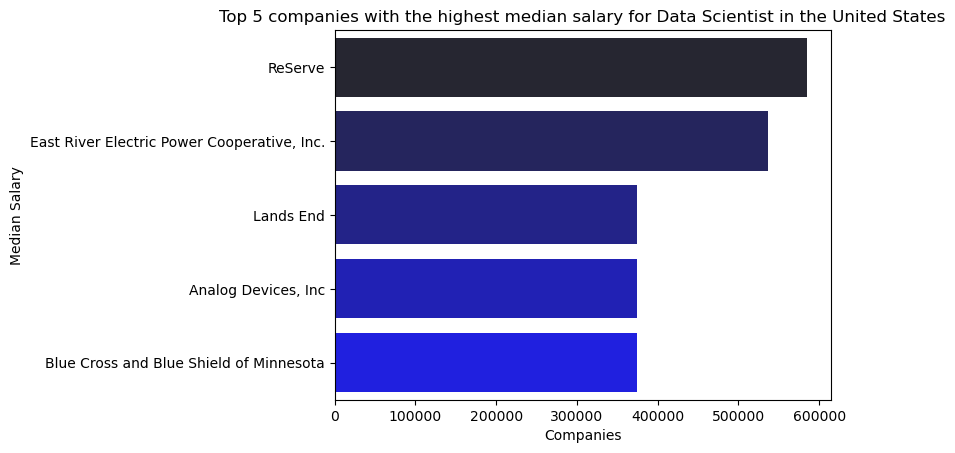

In [38]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']== 'United States')].dropna(subset='salary_year_avg')
df_DS_US_top = (
    df_DS_US.groupby('company_name')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .reset_index(name='median_salary')
    .head(5)
)

sns.barplot(df_DS_US_top,y='company_name',x='median_salary',hue='company_name', palette='dark:b')
plt.xlabel('Companies')
plt.ylabel('Median Salary')
plt.title('Top 5 companies with the highest median salary for Data Scientist in the United States')
plt.show()

🟨 Data Scientist Salary Histogram (2.20.2) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

    Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
    Use 25 bins for the histogram and set the x-axis limit to 700,000.
    Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

Hint:

Use the sns.histplot() function to create the histogram and filter the DataFrame using boolean indexing.

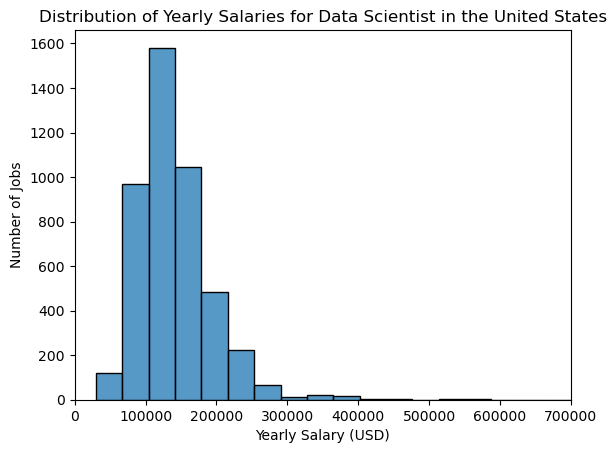

In [45]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']== 'United States')].dropna(subset='salary_year_avg')

sns.histplot(data=df_DS_US,x='salary_year_avg',bins=25)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700_000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.show()

🟨 Data Roles Salary Box Plot (2.20.3) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

    Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
    Set the x-axis limit to 300,000 and format it as $100k.
    Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

Code Needed:

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

Hint:

Use the sns.boxplot() function to visualize the salary distributions and format the x-axis labels to reflect thousands as 'k' using plt.FuncFormatter.

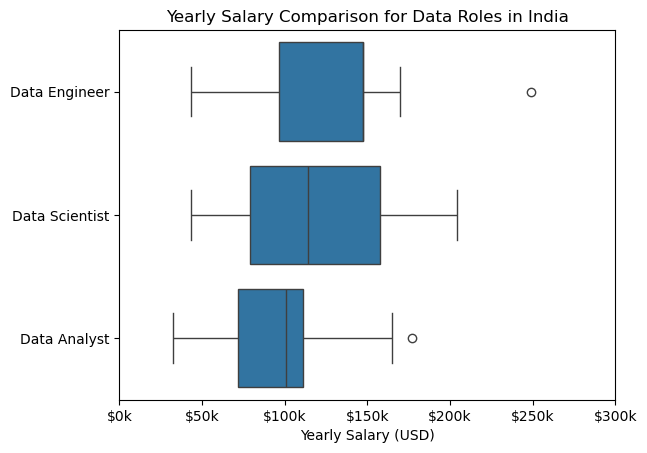

In [59]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_data_jobs_ind = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='India')].dropna(subset='salary_year_avg')

sns.boxplot(data=df_data_jobs_ind, x='salary_year_avg', y='job_title_short')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,300_000)
plt.show()

🟨 Salary Distribution for United States (2.20.4) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

    Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
    Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

Hint:

    Use sns.violinplot() with the x parameter set to job_country and the y parameter set to salary_year_avg.
    Utilize plt.ylim() and plt.gca().yaxis.set_major_formatter() to set and format the salary axis.


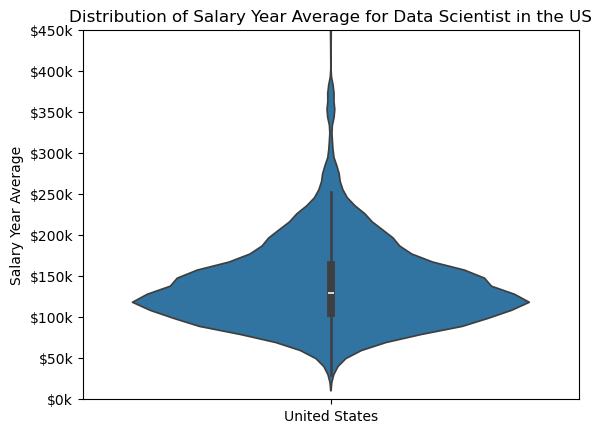

In [74]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']== 'United States')].dropna(subset='salary_year_avg')

sns.violinplot(data=df_DS_US,y='salary_year_avg',x='job_country')

plt.xlabel('')
plt.ylabel('Salary Year Average')
plt.title('Distribution of Salary Year Average for Data Scientist in the US')
plt.ylim(0,450_000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.show()
